In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os.path
import time
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
sentTrain = pd.read_csv('generic_sentiment_dataset_50k.csv')
display(sentTrain.head())
display(sentTrain.shape)

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\r\n2. No lag\r\n3. This is m...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0


(50000, 3)

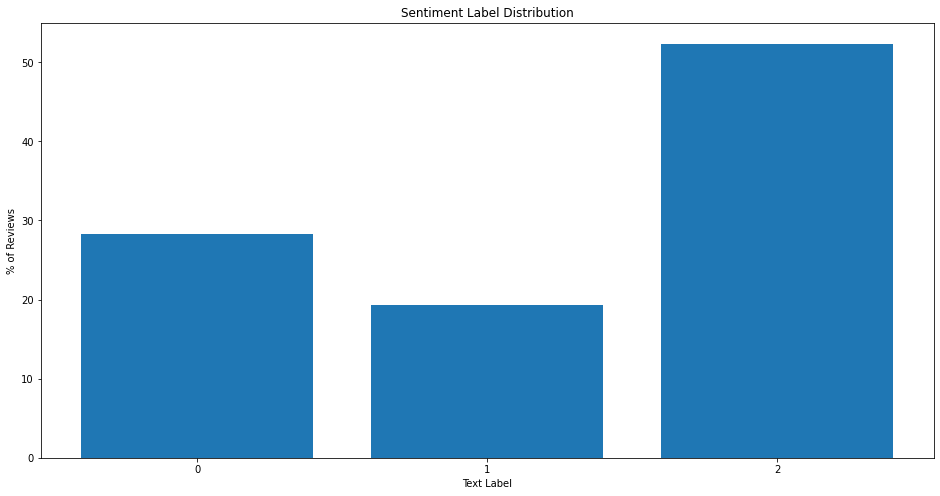

In [3]:
values, counts = np.unique(sentTrain['label'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure(figsize = (16,8))
plt.bar(values, normalized_counts*100)
plt.xlabel('Text Label')
plt.xticks([0,1,2])
plt.ylabel('% of Reviews')
plt.title("Sentiment Label Distribution")
plt.show()

In [4]:
# Provided to me during my Data Science diploma program

ENGLISH_STOP_WORDS = stopwords.words('english')

def customTokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    stemmer = nltk.stem.PorterStemmer()
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [5]:
X = sentTrain['text']
y = sentTrain['label']

In [6]:
if (os.path.exists('preRunModels/sentWordsVec.joblib')):
    sentWordsVec = joblib.load('preRunModels/sentWordsVec.joblib')
else:
    sentWordsVec = CountVectorizer(min_df = 75, 
                                   tokenizer = customTokenizer,
                                   ngram_range = (1,3))
    
    # Save the model result lists for loading in the futrure
    joblib.dump(sentWordsVec, 'preRunModels/sentWordsVec.joblib')
    
sentWordsVec.fit(X)
X_Vec = sentWordsVec.transform(X)

In [ ]:
if (os.path.exists('preRunModels/sentWordsIdf.joblib')):
    sentWordsIdf = joblib.load('preRunModels/sentWordsIdf.joblib')
else:
    sentWordsIdf = TfidfVectorizer(min_df = 75, 
                                   tokenizer = customTokenizer,
                                   ngram_range = (1,3),
                                   strip_accents = 'ascii')
    # Save the model result lists for loading in the futrure
    joblib.dump(sentWordsIdf, 'preRunModels/sentWordsIdf.joblib')
    
sentWordsIdf.fit(X)
X_Idf = sentWordsIdf.transform(X)

In [22]:
VecDF = pd.DataFrame(columns = sentWordsVec.get_feature_names(), data = X_Vec.toarray())
VecDF['label'] = y
display(VecDF)

,\r\n\r\ni,\r\n\r\nthe,0,1,1 day,1 month,10,10 day,100,10000,...,your,youtub,yummi,zoom,…,🇺🇸,🇺🇸 gopdeb,🇺🇸 gopdeb gopdeb,👍,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
check = VecDF.loc[0]
check.where(check > 0, inplace = True)
check.dropna(inplace = True)
print(check)
print()
print(f"Original Text: {sentTrain.iloc[0,1]}")
print(f"Original Label: {sentTrain.iloc[0,2]}")

5000                   1.0
5000 mah               1.0
batteri                1.0
big                    1.0
camera                 1.0
camera qualiti         1.0
camera qualiti good    1.0
good                   2.0
good mobil             1.0
mah                    1.0
mobil                  1.0
qualiti                1.0
qualiti good           1.0
label                  2.0
Name: 0, dtype: float64

Original Text: good mobile. battery is 5000 mah is very big. camera quality very good.
Original Label: 2


In [26]:
def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(16,8))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
    return words_df

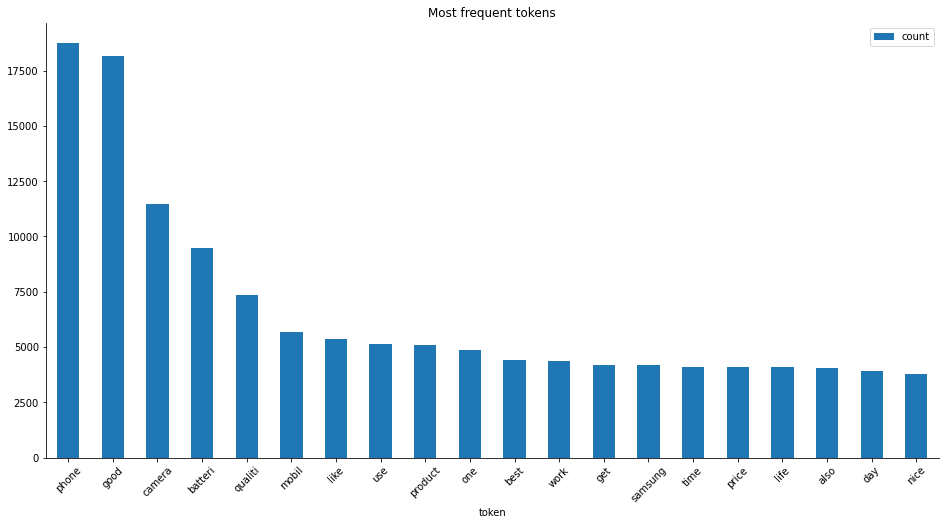

In [28]:
wordCountsVec = X_Vec.toarray().sum(axis=0)
wordsVec = sentWordsVec.get_feature_names()

wordsVecDF = plot_most_frequent(wordsVec, wordCountsVec)

In [30]:
IdfDF = pd.DataFrame(columns = sentWordsIdf.get_feature_names(), data = X_Idf.toarray())
IdfDF['label'] = y
display(IdfDF)

,\r\n\r\ni,\r\n\r\nthe,0,1,1 day,1 month,10,10 day,100,10000,...,year,yelp,yesterday,yet,youll,your,youtub,yummi,zoom,label
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.252649,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
49996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
49997,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49998,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [32]:
check = IdfDF.loc[0]
check.where(check > 0, inplace = True)
check.dropna(inplace = True)
print(check)
print()
print(f"Original Text: {sentTrain.iloc[0,1]}")
print(f"Original Label: {sentTrain.iloc[0,2]}")

5000                   0.359667
5000 mah               0.378035
batteri                0.160454
big                    0.300573
camera                 0.153798
camera qualiti         0.224137
camera qualiti good    0.318046
good                   0.260738
good mobil             0.333613
mah                    0.327722
mobil                  0.195968
qualiti                0.175102
qualiti good           0.284338
label                  2.000000
Name: 0, dtype: float64

Original Text: good mobile. battery is 5000 mah is very big. camera quality very good.
Original Label: 2


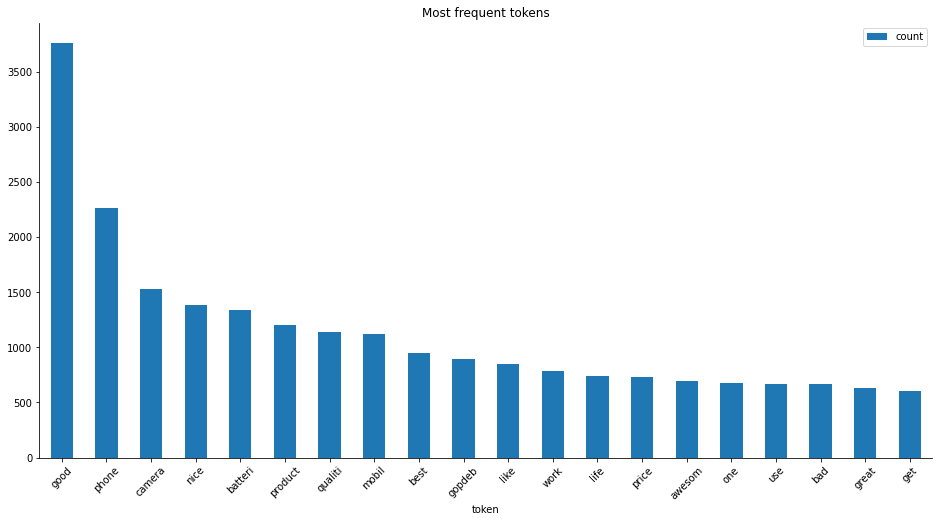

In [34]:
wordCountsIdf = X_Idf.toarray().sum(axis=0)
wordsIdf = sentWordsIdf.get_feature_names()

wrodsDF = plot_most_frequent(wordsIdf, wordCountsIdf)

In [36]:
XVec = VecDF.iloc[:, :-1]
yVec = VecDF.iloc[:,-1]
print(f"Shapes: {XVec.shape, yVec.shape}")

Shapes: ((50000, 1650), (50000,))


In [38]:
X_trainVec, X_valVec, y_trainVec, y_valVec = train_test_split(XVec, yVec, test_size=0.33, random_state=12)
print(f"Train Shapes: {X_trainVec.shape, y_trainVec.shape}")
print(f"Val Shapes: {X_valVec.shape, y_valVec.shape}")

Train Shapes: ((33500, 1650), (33500,))
Val Shapes: ((16500, 1650), (16500,))


In [40]:
valScores = []
trainScores = []
cVals = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/valScores.joblib') & os.path.exists('preRunModels/trainScores.joblib') & os.path.exists('preRunModels/cVals.joblib')):
    valScores = joblib.load('preRunModels/valScores.joblib')
    trainScores = joblib.load('preRunModels/trainScores.joblib')
    cVals = joblib.load('preRunModels/cVals.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    for c in C_range:
        my_logreg = LogisticRegression(solver='lbfgs', C = c, random_state = 12)
        my_logreg.fit(X_trainVec, y_trainVec)

        trainScores.append(my_logreg.score(X_trainVec, y_trainVec))
        valScores.append(my_logreg.score(X_valVec, y_valVec))
        cVals.append(c)
    
        # Print progress through the loop
        print(f"C={c}", end="\r")
        
    # Save the model result lists for loading in the futrure
    joblib.dump(valScores, 'preRunModels/valScores.joblib')
    joblib.dump(trainScores, 'preRunModels/trainScores.joblib')
    joblib.dump(cVals, 'preRunModels/cVals.joblib')
        
bestCValVec = cVals[np.argmax(valScores)]

Pre-run model will be loaded


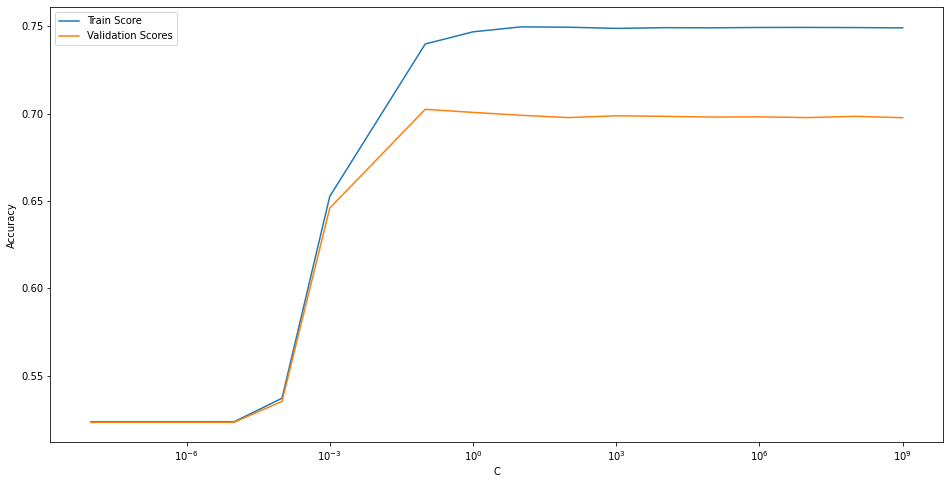

The c-calue with the highest valuation score is 0.1


In [42]:
plt.figure(figsize = (16,8))
plt.plot(C_range, trainScores,label="Train Score")
plt.plot(C_range, valScores,label="Validation Scores")
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The c-calue with the highest valuation score is {bestCValVec}")

In [44]:
# Empty list for model run times
timedResultList = []

In [46]:
logitVec = LogisticRegression(solver='lbfgs', C = bestCValVec, random_state = 12)

if (os.path.exists('preRunModels/logitVec.joblib')):
    logitVec = joblib.load('preRunModels/logitVec.joblib')
    print("Pre-run model will be loaded")
else:
    logitVec = logitVec.fit(X_trainVec, y_trainVec)
    joblib.dump(logitVec, 'preRunModels/logitVec.joblib')


print(f"Logestical Regression Train: {logitVec.score(X_trainVec, y_trainVec)}")
print(f"Logestical Regression Valuation: {logitVec.score(X_valVec, y_valVec)}")

Logestical Regression Train: 0.7398805970149254
Logestical Regression Valuation: 0.7024848484848485


In [48]:
XIdf = IdfDF.iloc[:, :-1]
yIdf = IdfDF.iloc[:,-1]
print(f"Shapes: {XIdf.shape, yIdf.shape}")

Shapes: ((50000, 1647), (50000,))


In [50]:
X_trainIdf, X_valIdf, y_trainIdf, y_valIdf = train_test_split(XIdf, yIdf, test_size=0.33, random_state=12)
print(f"Train Shapes: {X_trainIdf.shape, y_trainIdf.shape}")
print(f"Val Shapes: {X_valIdf.shape, y_valIdf.shape}")

Train Shapes: ((33500, 1647), (33500,))
Val Shapes: ((16500, 1647), (16500,))


In [52]:
valScores2 = []
trainScores2 = []
cVals2 = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/valScores2.joblib') & os.path.exists('preRunModels/trainScores2.joblib') & os.path.exists('preRunModels/cVals2.joblib')):
    valScores2 = joblib.load('preRunModels/valScores2.joblib')
    trainScores2 = joblib.load('preRunModels/trainScores2.joblib')
    cVals2 = joblib.load('preRunModels/cVals2.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    for c in C_range:
        my_logreg = LogisticRegression(solver='lbfgs', C = c, random_state = 12)
        my_logreg.fit(X_trainIdf, y_trainIdf)

        trainScores2.append(my_logreg.score(X_trainIdf, y_trainIdf))
        valScores2.append(my_logreg.score(X_valIdf, y_valIdf))
        cVals2.append(c)
    
        # Print progress through the loop
        print(f"C={c}", end="\r")
        
    # Save the model result lists for loading in the futrure
    joblib.dump(valScores2, 'preRunModels/valScores2.joblib')
    joblib.dump(trainScores2, 'preRunModels/trainScores2.joblib')
    joblib.dump(cVals2, 'preRunModels/cVals2.joblib')
        
bestCValIdf = cVals2[np.argmax(valScores2)]

Pre-run model will be loaded


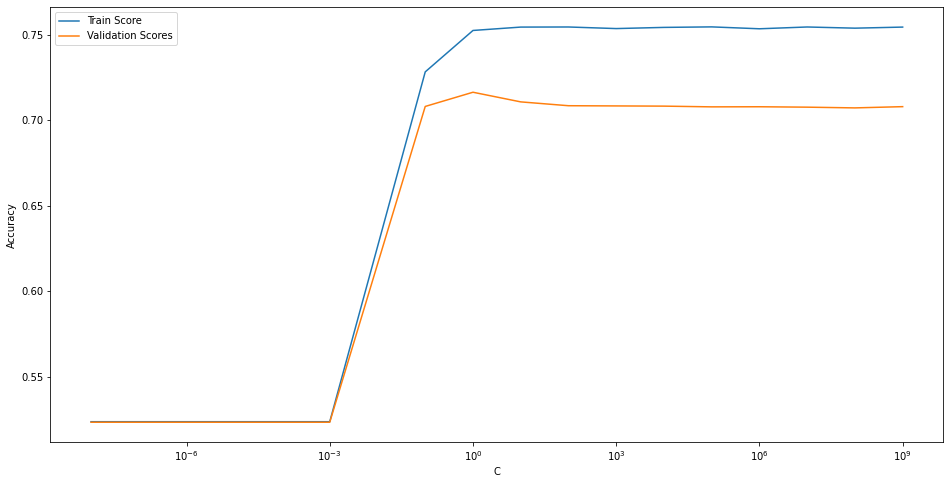

The c-calue with the highest valuation score is 1.0


In [54]:
plt.figure(figsize = (16,8))
plt.plot(C_range, trainScores2, label="Train Score")
plt.plot(C_range, valScores2, label="Validation Scores")
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The c-calue with the highest valuation score is {bestCValIdf}")

In [56]:

logitIdf = LogisticRegression(solver='lbfgs', C = bestCValIdf, random_state = 12)
if (os.path.exists('preRunModels/logitIdf.joblib')):
    logitIdf = joblib.load('preRunModels/logitIdf.joblib')
    print("Pre-run model will be loaded")
else:
    logitIdf = logitIdf.fit(X_trainIdf, y_trainIdf)
    joblib.dump(logitIdf, 'preRunModels/logitIdf.joblib')

print(f"Logestical Regression Train: {logitIdf.score(X_trainIdf, y_trainIdf)}")
print(f"Logestical Regression Valuation: {logitIdf.score(X_valIdf, y_valIdf)}")

Logestical Regression Train: 0.7523880597014926
Logestical Regression Valuation: 0.7163636363636363


In [58]:
vecPcaCheck = PCA(n_components = X_trainVec.shape[1])
vecPcaCheck.fit(X_trainVec)

explVar = vecPcaCheck.explained_variance_ratio_.cumsum()
np.where((explVar >= 0.9) & (explVar <= 0.91))

(array([750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762,
        763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775,
        776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788,
        789, 790, 791, 792, 793, 794, 795, 796, 797], dtype=int64),)

In [60]:
vecPCA = PCA(n_components=750)

vecPCA.fit(X_trainVec)

XVecTrainPCA = vecPCA.transform(X_trainVec)
XVecValPCA = vecPCA.transform(X_valVec)

In [62]:
if (os.path.exists('preRunModels/logitVecPca.joblib')):
    logitVecPca = joblib.load('preRunModels/logitVecPca.joblib')
    print("Pre-run model will be loaded")
else:
    logitVecPca = logitVec.fit(XVecTrainPCA, y_trainVec)
    joblib.dump(logitVecPca, 'preRunModels/logitVecPca.joblib')


print(f"Logestical Regression Train: {logitVecPca.score(XVecTrainPCA, y_trainVec)}")
print(f"Logestical Regression Valuation: {logitVecPca.score(XVecValPCA, y_valVec)}")

Logestical Regression Train: 0.7005970149253732
Logestical Regression Valuation: 0.6872121212121212


In [64]:
idfPcaCheck = PCA(n_components = X_trainIdf.shape[1])
idfPcaCheck.fit(X_trainIdf)

explVar = idfPcaCheck.explained_variance_ratio_.cumsum()
np.where((explVar >= 0.9) & (explVar <= 0.91))

(array([ 981,  982,  983,  984,  985,  986,  987,  988,  989,  990,  991,
         992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001, 1002,
        1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
        1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022], dtype=int64),)

In [66]:
idfPCA = PCA(n_components=981)

idfPCA.fit(X_trainIdf)

XIdfTrainPCA = idfPCA.transform(X_trainIdf)
XIdfValPCA = idfPCA.transform(X_valIdf)

In [67]:
if (os.path.exists('preRunModels/logitIdfPca.joblib')):
    logitIdfPca = joblib.load('preRunModels/logitIdfPca.joblib')
    print("Pre-run model will be loaded")
else:
    logitIdfPca = logitIdf.fit(XIdfTrainPCA, y_trainIdf)
    joblib.dump(logitIdfPca, 'preRunModels/logitIdfPca.joblib')


print(f"Logestical Regression Train: {logitIdfPca.score(XIdfTrainPCA, y_trainIdf)}")
print(f"Logestical Regression Valuation: {logitIdfPca.score(XIdfValPCA, y_valIdf)}")

Logestical Regression Train: 0.7181492537313433
Logestical Regression Valuation: 0.6992121212121212


## Vec C-Value

In [68]:
valScores3 = []
trainScores3 = []
cVals3 = []
C_range = np.array([0.1,1,10,100])

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/valScores3.joblib') & os.path.exists('preRunModels/trainScores3.joblib') & os.path.exists('preRunModels/cVals3.joblib')):
    valScores3 = joblib.load('preRunModels/valScores3.joblib')
    trainScores3 = joblib.load('preRunModels/trainScores3.joblib')
    cVals3 = joblib.load('preRunModels/cVals3.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    for c in C_range:
        # Print progress through the loop
        print(f"C={c}", end="\r")
        
        svcVec = SVC(C = c, random_state = 12)
        svcVec.fit(X_trainVec, y_trainVec)

        trainScores3.append(svcVec.score(X_trainVec, y_trainVec))
        valScores3.append(svcVec.score(X_valVec, y_valVec))
        cVals3.append(c)
        
    # Save the model result lists for loading in the futrure
    joblib.dump(valScores3, 'preRunModels/valScores3.joblib')
    joblib.dump(trainScores3, 'preRunModels/trainScores3.joblib')
    joblib.dump(cVals3, 'preRunModels/cVals3.joblib')
        
bestCValVecSvc = cVals3[np.argmax(valScores3)]

Pre-run model will be loaded


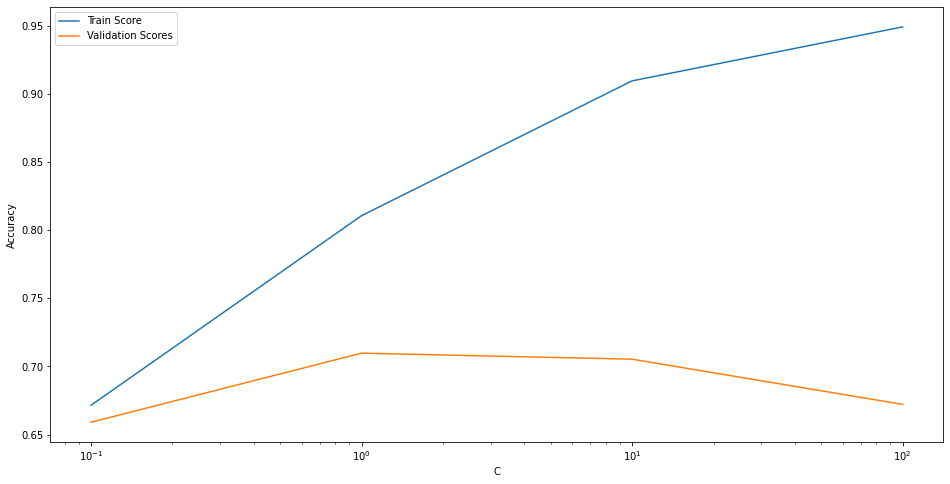

The c-value with the highest valuation score is 1.0


In [69]:
plt.figure(figsize = (16,8))
plt.plot(C_range, trainScores3, label="Train Score")
plt.plot(C_range, valScores3, label="Validation Scores")
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The c-value with the highest valuation score is {bestCValVecSvc}")

## IDF C-Value

In [70]:
valScores31 = []
trainScores31 = []
cVals31 = []
C_range = np.array([0.1,1,10,100])

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/valScores3.joblib') & 
    os.path.exists('preRunModels/trainScores31.joblib') & 
    os.path.exists('preRunModels/cVals3.joblib')):
    valScores31 = joblib.load('preRunModels/valScores31.joblib')
    trainScores31 = joblib.load('preRunModels/trainScores31.joblib')
    cVals31 = joblib.load('preRunModels/cVals31.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    for c in C_range:
        # Print progress through the loop
        print(f"C={c}", end="\r")
        
        svcIdf = SVC(C = c, random_state = 12)
        svcIdf.fit(X_trainIdf, y_trainIdf)

        trainScores31.append(svcIdf.score(X_trainIdf, y_trainIdf))
        valScores31.append(svcIdf.score(X_valIdf, y_valIdf))
        cVals31.append(c)
        
    # Save the model result lists for loading in the futrure
    joblib.dump(valScores31, 'preRunModels/valScores31.joblib')
    joblib.dump(trainScores31, 'preRunModels/trainScores31.joblib')
    joblib.dump(cVals31, 'preRunModels/cVals31.joblib')
        
bestCValIdfSvc = cVals31[np.argmax(valScores31)]

Pre-run model will be loaded


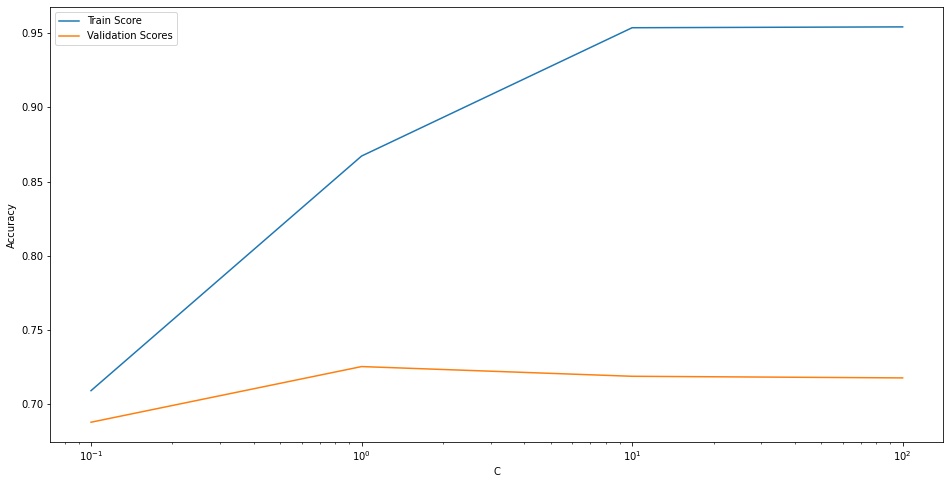

The c-value with the highest valuation score is 1.0


In [71]:
plt.figure(figsize = (16,8))
plt.plot(C_range, trainScores31, label="Train Score")
plt.plot(C_range, valScores31, label="Validation Scores")
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The c-value with the highest valuation score is {bestCValIdfSvc}")

## SVC Models

In [73]:
svcVecNlp = SVC(C = bestCValVecSvc, random_state = 12)
if (os.path.exists('preRunModels/svcVecNlp.joblib')):
    svcVecNlp = joblib.load('preRunModels/svcVecNlp.joblib')
    print("Pre-run model will be loaded")
else:
    print("Nope")

Pre-run model will be loaded


In [7]:
svcVecNlp = SVC(C = bestCValVecSvc, random_state = 12)
if (os.path.exists('preRunModels/svcVecNlp.joblib') & os.path.exists('preRunModels/svcVecNlpTrainScore.joblib') & os.path.exists('preRunModels/svcVecNlpValScore.joblib')):
    svcVecNlp = joblib.load('preRunModels/svcVecNlp.joblib')
    svcVecNlpTrainScore = joblib.load('preRunModels/svcVecNlpTrainScore.joblib')
    svcVecNlpValScore = joblib.load('preRunModels/svcVecNlpValScore.joblib')
    print("Pre-run model will be loaded")
else:
    svcVecNlp = svcVecNlp.fit(X_trainVec, y_trainVec)
    svcVecNlpTrainScore = svcVecNlp.score(X_trainVec, y_trainVec)
    svcVecNlpValScore = svcVecNlp.score(X_valVec, y_valVec)

    joblib.dump(svcVecNlp, 'preRunModels/svcVecNlp.joblib')
    joblib.dump(svcVecNlpTrainScore, 'preRunModels/svcVecNlpTrainScore.joblib')
    joblib.dump(svcVecNlpValScore, 'preRunModels/svcVecNlpValScore.joblib')

print(f"SVC Vec Train: {svcVecNlpTrainScore}")
print(f"SVC Vec Valuation: {svcVecNlpValScore}",end= "\n")

print()

svcIdfNlp = SVC(C = bestCValIdfSvc, random_state = 12)
if (os.path.exists('preRunModels/svcIdfNlp.joblib') & os.path.exists('preRunModels/svcIdfNlpTrainScore.joblib') & os.path.exists('preRunModels/svcIdfNlpValScore.joblib')):
    svcIdfNlp = joblib.load('preRunModels/svcIdfNlp.joblib')
    svcIdfNlpTrainScore = joblib.load('preRunModels/svcIdfNlpTrainScore.joblib')
    svcIdfNlpValScore = joblib.load('preRunModels/svcIdfNlpValScore.joblib')
    print("Pre-run model will be loaded")
else:
    svcIdfNlp = svcIdfNlp.fit(X_trainIdf, y_trainIdf)
    svcIdfNlpTrainScore = svcIdfNlp.score(X_trainIdf, y_trainIdf)
    svcIdfNlpValScore = svcIdfNlp.score(X_valIdf, y_valIdf)

    joblib.dump(svcIdfNlp, 'preRunModels/svcIdfNlp.joblib')
    joblib.dump(svcIdfNlpTrainScore, 'preRunModels/svcIdfNlpTrainScore.joblib')
    joblib.dump(svcIdfNlpValScore, 'preRunModels/svcIdfNlpValScore.joblib')

print(f"SVC IDF Train: {svcIdfNlpTrainScore}")
print(f"SVC IDF Valuation: {svcIdfNlpValScore}")

NameError: name 'bestCValVecSvc' is not defined

## Multiclass Model Builder Function

In [40]:
def getModelScores(resultList, model, trainSetX, trainSetY, valSet, modelName):
    # Start Timer
    start = time.time()
    # Empty list for test specific results
    timeResultsData = []

    # Model compilationa nd fitti
    tempModel = model
    tempModel.fit(trainSetX, trainSetY)
    
    # Model predictions
    y1_train_pred = tempModel.predict(trainSetX)
    y1_val_pred = tempModel.predict(valSet)

    # Prediction Scoring
    trainScore2 = accuracy_score(trainSetX, y1_train_pred)
    valScore2 = accuracy_score(valSet, y1_val_pred)
    precScore2 = precision_score(valSet, y1_val_pred)
    recScore2 = recall_score(valSet, y1_val_pred)

    # End Timer
    end = time.time()
    # Append results to temp list
    timeResultsData.append(modelName)
    timeResultsData.append(trainScore2)
    timeResultsData.append(valScore2)
    timeResultsData.append(precScore2)
    timeResultsData.append(recScore2)
    totalTime2 = round(end - start,2)
    timeResultsData.append(totalTime2)
    resultList.append(timeResultsData)

    # Printing model results
    print(f"Time: {totalTime2} seconds")
    print(f"Accuracy score of the train set: {trainScore2}")
    print(f"Accuracy score of the validation set: {valScore2}")
    print(f"Precision score of the validation set: {precScore2}")
    print(f"Recall score of the validation set: {recScore2}")

## Vec K-Values broad

In [ ]:
# Empty lists to store iteration results
valScores4 = []
trainScores4 = []
K_values4 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores4.joblib') & 
    os.path.exists('preRunModels/valScores4.joblib') & 
    os.path.exists('preRunModels/kValues4.joblib')):
    trainScores4 = joblib.load('preRunModels/trainScores4.joblib')
    valScores4 = joblib.load('preRunModels/valScores4.joblib')
    K_values4 = joblib.load('preRunModels/kValues4.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # for a range the size of the total data points we have in steps of 100
    for k in range(1, X_trainVec.shape[0],100):

        # Train and fit model with testing number of neighbors
        knnVec = KNeighborsClassifier(n_neighbors=k).fit(X_trainVec, y_trainVec)

        # Predict model
        y_train_pred = knnVec.predict(X_trainVec)
        y_test_pred = knnVec.predict(X_valVec)

        # Save model predictions and the relative number of neighbors to lists
        trainScores4.append(accuracy_score(X_trainVec, y_train_pred))
        valScores4.append(accuracy_score(X_valVec, y_test_pred))
        K_values4.append(k)

        # Print progress through the loop
        print(f"K={k}/{X_trainVec.shape[0]}", end="\r")
    
    # Save the model result lists for loading in the futrure
    joblib.dump(trainScores4, 'preRunModels/trainScores4.joblib')
    joblib.dump(valScores4, 'preRunModels/valScores4.joblib')
    joblib.dump(K_values4, 'preRunModels/kValues4.joblib')
    
bestKValVecKnn = K_values4[np.argmax(valScores4)]

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(K_values4, trainScores4, label="Train Score")
plt.plot(K_values4, valScores4, label="Validation Scores")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The K-Value with the highest valuation score is {bestKValVecKnn}")

## Vec K-Values narrow

In [ ]:
# Empty lists to store iteration results
valScores5 = []
trainScores5 = []
K_values5 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores5.joblib') & 
    os.path.exists('preRunModels/valScores5.joblib') & 
    os.path.exists('preRunModels/kValues5.joblib')):
    trainScores5 = joblib.load('preRunModels/trainScores5.joblib')
    valScores5 = joblib.load('preRunModels/valScores5.joblib')
    K_values5 = joblib.load('preRunModels/K_values5.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # for a range the size of the total data points we have in steps of 100
    for k in range(1,?????):

        # Train and fit model with testing number of neighbors
        knnVec = KNeighborsClassifier(n_neighbors=k).fit(X_trainVec, y_trainVec)

        # Predict model
        y_train_pred = knnVec.predict(X_trainVec)
        y_test_pred = knnVec.predict(X_valVec)

        # Save model predictions and the relative number of neighbors to lists
        trainScores5.append(accuracy_score(X_trainVec, y_train_pred))
        valScores5.append(accuracy_score(X_valVec, y_test_pred))
        K_values5.append(k)

        # Print progress through the loop
        print(f"K={k}/?????", end="\r")
    
    # Save the model result lists for loading in the futrure
    joblib.dump(trainScores5, 'preRunModels/trainScores5.joblib')
    joblib.dump(valScores5, 'preRunModels/valScores5.joblib')
    joblib.dump(K_values5, 'preRunModels/K_values5.joblib')
    
bestKValVecKnn = K_values5[np.argmax(valScores5)]

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(K_values5, trainScores5, label="Train Score")
plt.plot(K_values5, valScores5, label="Validation Scores")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The K-Value with the highest valuation score is {bestKValVecKnn}")

## IDF K-Values broad

In [ ]:
# Empty lists to store iteration results
trainScores41 = []
valScores41 = []
K_values41 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores41.joblib') & 
    os.path.exists('preRunModels/valScores41.joblib') & 
    os.path.exists('preRunModels/kValues41.joblib')):
    trainScores41 = joblib.load('preRunModels/trainScores41.joblib')
    valScores41 = joblib.load('preRunModels/valScores41.joblib')
    K_values41 = joblib.load('preRunModels/kValues41.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # for a range the size of the total data points we have in steps of 100
    for k in range(1, X_trainIdf.shape[0],100):

        # Print progress through the loop
        print(f"K={k}/{X_trainIdf.shape[0]}", end="\r")
        
        # Train and fit model with testing number of neighbors
        knnIdf = KNeighborsClassifier(n_neighbors=k).fit(X_trainIdf, y_trainIdf)

        # Predict model
        y_train_pred = knnIdf.predict(X_trainIdf)
        y_test_pred = knnIdf.predict(X_valIdf)

        # Save model predictions and the relative number of neighbors to lists
        trainScores41.append(accuracy_score(X_trainIdf, y_train_pred))
        valScores41.append(accuracy_score(X_valIdf, y_test_pred))
        K_values41.append(k)

    # Save the model result lists for loading in the futrure
    joblib.dump(trainScores41, 'preRunModels/trainScores41.joblib')
    joblib.dump(valScores41, 'preRunModels/valScores41.joblib')
    joblib.dump(K_values41, 'preRunModels/kValues41.joblib')
    
bestKValIdfKnn = K_values41[np.argmax(valScores41)]

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(K_values41, trainScores41, label="Train Score")
plt.plot(K_values41, valScores41, label="Validation Scores")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The K-Value with the highest valuation score is {bestKValIdfKnn}")

## IDF K-Values narrow

In [ ]:
# Empty lists to store iteration results
trainScores51 = []
valScores51 = []
K_values51 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores51.joblib') & 
    os.path.exists('preRunModels/valScores51.joblib') & 
    os.path.exists('preRunModels/K_values51.joblib')):
    trainScores51 = joblib.load('preRunModels/trainScores51.joblib')
    valScores51 = joblib.load('preRunModels/valScores51.joblib')
    K_values51 = joblib.load('preRunModels/K_values51.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # for a range the size of the total data points we have in steps of 100
    for k in range(1, ????):

        # Print progress through the loop
        print(f"K={k}/?????", end="\r")
        
        # Train and fit model with testing number of neighbors
        knnIdf = KNeighborsClassifier(n_neighbors=k).fit(X_trainIdf, y_trainIdf)

        # Predict model
        y_train_pred = knnIdf.predict(X_trainIdf)
        y_test_pred = knnIdf.predict(X_valIdf)

        # Save model predictions and the relative number of neighbors to lists
        trainScores51.append(accuracy_score(X_trainIdf, y_train_pred))
        valScores51.append(accuracy_score(X_valIdf, y_test_pred))
        K_values51.append(k)

    # Save the model result lists for loading in the futrure
    joblib.dump(trainScores51, 'preRunModels/trainScores51.joblib')
    joblib.dump(valScores51, 'preRunModels/valScores51.joblib')
    joblib.dump(K_values51, 'preRunModels/K_values51.joblib')
    
bestKValIdfKnn = K_values51[np.argmax(valScores51)]

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(K_values51, trainScores51, label="Train Score")
plt.plot(K_values51, valScores51, label="Validation Scores")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The K-Value with the highest valuation score is {bestKValIdfKnn}")

## KNN Models

In [ ]:
knnVecNlp = KNeighborsClassifier(n_neighbors=k).fit(X_trainVec, y_trainVec)
getModelScores(timedResultList, knnNlp, X_trainVec, y_trainVec, X_valVec, 'KNN Vec')

knnIdfNlp = KNeighborsClassifier(n_neighbors=k).fit(X_trainIdf, y_trainIdf)
getModelScores(timedResultList, knnIdfNlp, X_trainIdf, y_trainIdf, X_valIdf, 'KNN Idf')

## Vec Min Values

In [ ]:
# Range to loop through from 1-20000
minSamples = np.arange(1, 50000)
# Empty lists to store results for graphing
trainScores6 = []
valScores6 = []
min_value6 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores6.joblib') & 
    os.path.exists('preRunModels/valScores6.joblib') & 
    os.path.exists('preRunModels/min_value6.joblib')):
    trainScores6 = joblib.load('preRunModels/trainScores6.joblib')
    valScores6 = joblib.load('preRunModels/valScores6.joblib')
    min_value6 = joblib.load('preRunModels/min_value6.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # For each number from 1-20000....
    for minS in minSamples:
        # Compile, train, and fit the model and data
        dtVec = DecisionTreeClassifier(min_samples_leaf = minS, random_state=12)
        dtVec.fit(X_trainVec, y_trainVec)

        # Predict the data on the model
        y_train_pred = dtVec.predict(X_trainVec)
        y_test_pred = dtVec.predict(X_valVec)

        # Score the model predictions
        trainScores6.append(accuracy_score(X_trainVec, y_trainVec))
        valScores6.append(accuracy_score(X_valVec, y_test_pred))
        min_value6.append(minS)
        
        # Print the progress of the loop
        print(f"min samples={minS}/50000", end="\r")
        
    # SAve teh results lists to file
    joblib.dump(trainScores6, 'preRunModels/trainScores6.joblib')
    joblib.dump(valScores6, 'preRunModels/valScores6.joblib')
    joblib.dump(min_value6, 'preRunModels/min_value6.joblib')
    
bestMinValVecDt = min_value6[np.argmax(valScores6)]

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(min_value6, trainScores6, label="Train Score")
plt.plot(min_value6, valScores6, label="Validation Scores")
plt.xlabel('Min Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The Min Value with the highest valuation score is {bestMinValVecDt}")

## IDF Min Values

In [ ]:
# Range to loop through from 1-20000
minSamples = np.arange(1, 50000)
# Empty lists to store results for graphing
trainScores61 = []
valScores61 = []
min_value61 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores61.joblib') & 
    os.path.exists('preRunModels/valScores61.joblib') & 
    os.path.exists('preRunModels/min_value61.joblib')):
    trainScores61 = joblib.load('preRunModels/trainScores61.joblib')
    valScores61 = joblib.load('preRunModels/valScores61.joblib')
    min_value61 = joblib.load('preRunModels/min_value61.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # For each number from 1-20000....
    for minS in minSamples:
        # Compile, train, and fit the model and data
        dtIdf = DecisionTreeClassifier(min_samples_leaf = minS, random_state=12)
        dtIdf.fit(X_trainIdf, y_trainIdf)

        # Predict the data on the model
        y_train_pred = dtIdf.predict(X_trainIdf)
        y_test_pred = dtIdf.predict(X_valIdf)

        # Score the model predictions
        trainScores61.append(accuracy_score(X_trainIdf, y_trainIdf))
        valScores61.append(accuracy_score(X_valIdf, y_test_pred))
        min_value61.append(minS)
        
        # Print the progress of the loop
        print(f"min samples={minS}/50000", end="\r")
        
    # SAve teh results lists to file
    joblib.dump(trainScores61, 'preRunModels/trainScores61.joblib')
    joblib.dump(valScores61, 'preRunModels/valScores61.joblib')
    joblib.dump(min_value61, 'preRunModels/min_value61.joblib')
    
bestMinValIdfDt = min_value61[np.argmax(valScores61)]

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(min_value61, trainScores61, label="Train Score")
plt.plot(min_value61, valScores61, label="Validation Scores")
plt.xlabel('Min Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The Min Value with the highest valuation score is {bestMinValIdfDt}")

## Vec Depths

In [ ]:
# Range to loop through from 1-50
depths = np.arange(1, 51)
# Empty lists to store results for graphing
trainScores7 = []
valScores7 = []
depth_value7 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores7.joblib') & 
    os.path.exists('preRunModels/valScores7.joblib') & 
    os.path.exists('preRunModels/depth_value7.joblib')):
    trainScores7 = joblib.load('preRunModels/trainScores7.joblib')
    valScores7 = joblib.load('preRunModels/valScores7.joblib')
    depth_value7 = joblib.load('preRunModels/depth_value7.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # For each number from 1-20000....
    for depth in depths:
        # Compile, train, and fit the model and data
        dtVec = DecisionTreeClassifier(max_depth = depth, 
                                       min_samples_leaf = bestMinValVecDt, 
                                       random_state=12)
        dtVec.fit(X_trainVec, y_trainVec)

        # Predict the data on the model
        y_train_pred = dtVec.predict(X_trainVec)
        y_test_pred = dtVec.predict(X_valVec)

        # Score the model predictions
        trainScores7.append(accuracy_score(X_trainVec, y_trainVec))
        valScores7.append(accuracy_score(X_valVec, y_test_pred))
        depth_value7.append(depth)
        
        # Print the progress of the loop
        print(f"depth={depth}/50", end="\r")
        
    # SAve teh results lists to file
    joblib.dump(trainScores7, 'preRunModels/trainScores7.joblib')
    joblib.dump(valScores7, 'preRunModels/valScores7.joblib')
    joblib.dump(depth_value7, 'preRunModels/depth_value7.joblib')
    
bestDepthValVecDt = depth_value7[np.argmax(valScores7)]

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(depth_value7, trainScores7, label="Train Score")
plt.plot(depth_value7, valScores7, label="Validation Scores")
plt.xlabel('Depth Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The Depth Value with the highest valuation score is {bestDepthValVecDt}")

## IDF Depths

In [ ]:
# Range to loop through from 1-50
depths = np.arange(1, 51)
# Empty lists to store results for graphing
trainScores71 = []
valScores71 = []
depth_value71 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores71.joblib') & 
    os.path.exists('preRunModels/valScoresvalScores71.joblib') & 
    os.path.exists('preRunModels/depth_value71.joblib')):
    trainScores71 = joblib.load('preRunModels/trainScores71.joblib')
    valScores71 = joblib.load('preRunModels/valScores71.joblib')
    depth_value71 = joblib.load('preRunModels/depth_value71.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # For each number from 1-20000....
    for depth in depths:
        # Compile, train, and fit the model and data
        dtIdf = DecisionTreeClassifier(max_depth = depth, 
                                       min_samples_leaf = bestMinValIdfDt, 
                                       random_state=12)
        dtIdf.fit(X_trainIdf, y_trainIdf)

        # Predict the data on the model
        y_train_pred = dtIdf.predict(X_trainIdf)
        y_test_pred = dtIdf.predict(X_valIdf)

        # Score the model predictions
        trainScores71.append(accuracy_score(X_trainIdf, y_train_pred))
        valScores71.append(accuracy_score(X_valIdf, y_test_pred))
        depth_value71.append(depth)
        
        # Print the progress of the loop
        print(f"depth={depth}/50", end="\r")
        
    # SAve teh results lists to file
    joblib.dump(trainScores71, 'preRunModels/trainScores71.joblib')
    joblib.dump(valScores71, 'preRunModels/valScores71.joblib')
    joblib.dump(depth_value71, 'preRunModels/depth_value71.joblib')
    
bestDepthValIdfDt = depth_value71[np.argmax(valScores71)]

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(depth_value71, trainScores71, label="Train Score")
plt.plot(depth_value71, valScores71, label="Validation Scores")
plt.xlabel('Depth Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The Depth Value with the highest valuation score is {bestDepthValIdfDt}")

## Decision Tree Models

In [ ]:
dtVecNlp = DecisionTreeClassifier(max_depth = bestDepthValVecDt, min_samples_leaf = bestMinValVecDt, random_state=12)
getModelScores(timedResultList, dtVecNlp, X_trainVec, y_trainVec, X_valVec, 'DT Vec')

dtIdfNlp = DecisionTreeClassifier(max_depth = bestDepthValIdfDt, min_samples_leaf = bestMinValIdfDt, random_state=12)
getModelScores(timedResultList, dtIdfNlp, X_trainIdf, y_trainIdf, X_valIdf, 'DT Idf')